In [1]:
# importare tutte le librerie necessarie
import pandas as pd
import numpy as np
import datetime as dt
from tabulate import tabulate
import matplotlib.pyplot as plt
path = r".\\DataSet\\"
import seaborn as sns
import statsmodels.api as sm

In [9]:
allMadrid = pd.read_csv(path+"out.csv")
allMadrid['date'] = pd.to_datetime(allMadrid['date'], format='%Y/%m/%d %H:%M:%S')
allMadrid=allMadrid.groupby(['date']).mean()
#index = pd.DatetimeIndex(allMadrid['date'])
#allMadrid.index = index
display(allMadrid)

,BEN,CO,EBE,NMHC,NO,NO_2,O_3,PM10,PM25,SO_2,TCH,TOL,station
date,,,,,,,,,,,,,
2008-01-01 01:00:00,2.111250,1.192083,1.963750,0.522000,11.820078,94.703462,5.049583,106.588749,57.855000,30.4964,1.933000,7.543750,2.807902e+07
2008-01-01 02:00:00,2.705000,1.201250,2.237500,0.412000,11.820078,94.996538,4.968000,125.566924,61.555000,25.9028,1.786000,9.366250,2.807902e+07
2008-01-01 03:00:00,1.841250,0.909583,1.613750,0.320000,11.820078,78.414230,5.091200,90.754616,39.211250,19.9772,1.606000,6.032500,2.807902e+07
2008-01-01 04:00:00,1.415000,0.793333,1.020000,0.298000,11.820078,71.075384,4.989200,44.526539,38.873750,16.5884,1.538000,4.236250,2.807902e+07
2008-01-01 05:00:00,1.238750,0.753333,0.917500,0.320000,11.820078,67.167308,4.935417,37.135769,25.625000,15.7836,1.582000,3.898750,2.807902e+07
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018-04-30 20:00:00,0.283333,0.240000,0.150000,0.063333,5.083333,25.666667,81.428571,7.307692,4.333333,4.2000,1.310000,0.533333,2.807904e+07
2018-04-30 21:00:00,0.350000,0.250000,0.216667,0.063333,4.708333,31.750000,72.571429,9.153846,4.333333,4.4000,1.313333,0.866667,2.807904e+07
2018-04-30 22:00:00,0.316667,0.250000,0.200000,0.063333,4.083333,30.333333,67.571429,8.076923,4.666667,4.5000,1.313333,0.716667,2.807904e+07


<AxesSubplot: xlabel='date'>

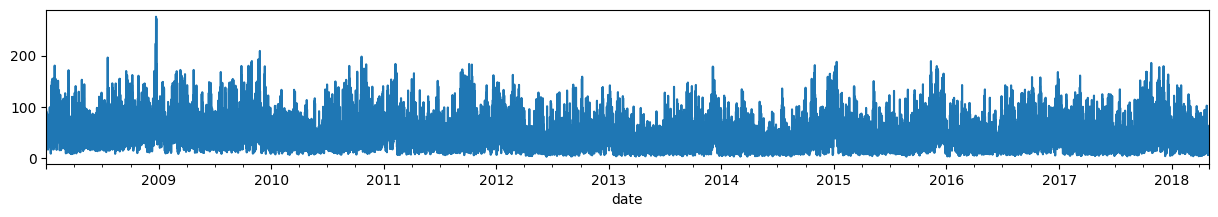

In [10]:
#index = pd.DatetimeIndex(allMadrid['date'])
#no2Tab=pd.DataFrame({'NO2':allMadrid['NO_2']},index=index)
#display(no2Tab)
forNo2 = allMadrid['NO_2']
forNo2.plot(figsize=(15, 2))

Ora creiamo il modello per le previsioni. 
Il modello scelto è un AR(1), e lo costruiremo grazie alla classe `SARIMAX` di statsmodels.
Poi stimiamo i suoi parametri con il metodo `fit`. 
Infine con il metodo `summary` produrremo le diverse tabelle che mostrano i risultati.

In [11]:
# Construct the model
mod = sm.tsa.SARIMAX(forNo2, order=(1, 0, 0), trend='c')
# Estimate the parameters
res = mod.fit()

print(res.summary())

d:\Program Files\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  self._init_dates(dates, freq)
d:\Program Files\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:                   NO_2   No. Observations:                90552
Model:               SARIMAX(1, 0, 0)   Log Likelihood             -336552.973
Date:                Tue, 29 Nov 2022   AIC                         673111.946
Time:                        07:46:24   BIC                         673140.187
Sample:                    01-01-2008   HQIC                        673120.555
                         - 05-01-2018                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      3.0530      0.075     40.448      0.000       2.905       3.201
ar.L1          0.9285      0.001    900.193      0.000       0.927       0.931
sigma2        99.1080      0.256    386.844      0.0

In [12]:
# Here we construct a more complete results object.
fcast_res1 = res.get_forecast(steps=5)

# Most results are collected in the `summary_frame` attribute.
# Here we specify that we want a confidence level of 90%
print(fcast_res1.summary_frame(alpha=0.10))

NO_2                      mean    mean_se  mean_ci_lower  mean_ci_upper
2018-05-01 01:00:00  30.096960   9.955301      13.721947      46.471974
2018-05-01 02:00:00  30.999471  13.585246       8.653731      53.345212
2018-05-01 03:00:00  31.837495  16.069679       5.405226      58.269764
2018-05-01 04:00:00  32.615639  17.937605       3.110904      62.120374
2018-05-01 05:00:00  33.338182  19.404310       1.420932      65.255432


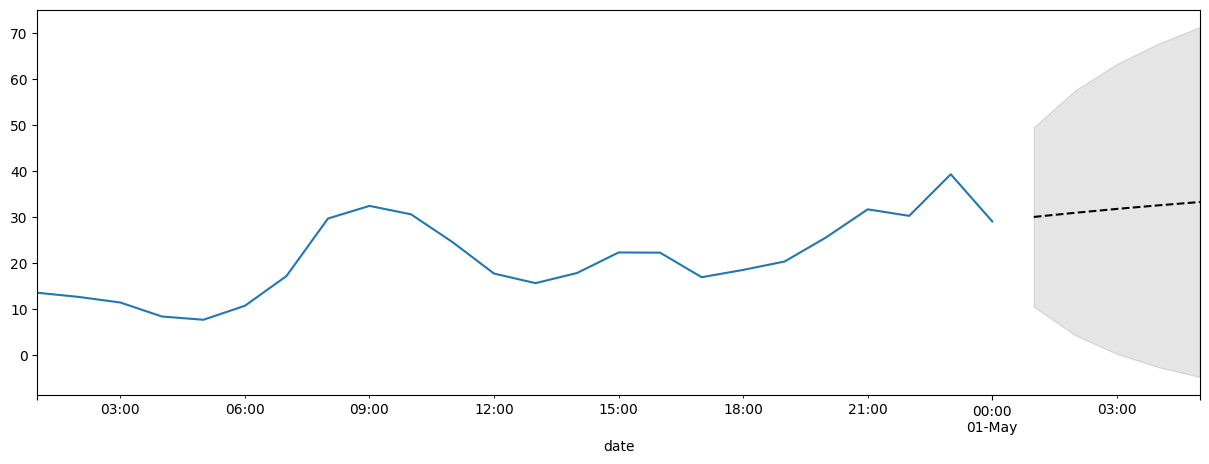

In [24]:
fig, ax = plt.subplots(figsize=(15, 5))

# Plot the data (here we are subsetting it to get a better look at the forecasts)
#forNo2.reset_index()
forNo2.loc['2018-04-30 01:00:00':].plot(ax=ax)

# Construct the forecasts
fcast = res.get_forecast(steps=5).summary_frame()
fcast['mean'].plot(ax=ax, style='k--')
ax.fill_between(fcast.index, fcast['mean_ci_lower'], fcast['mean_ci_upper'], color='k', alpha=0.1)

<AxesSubplot: >

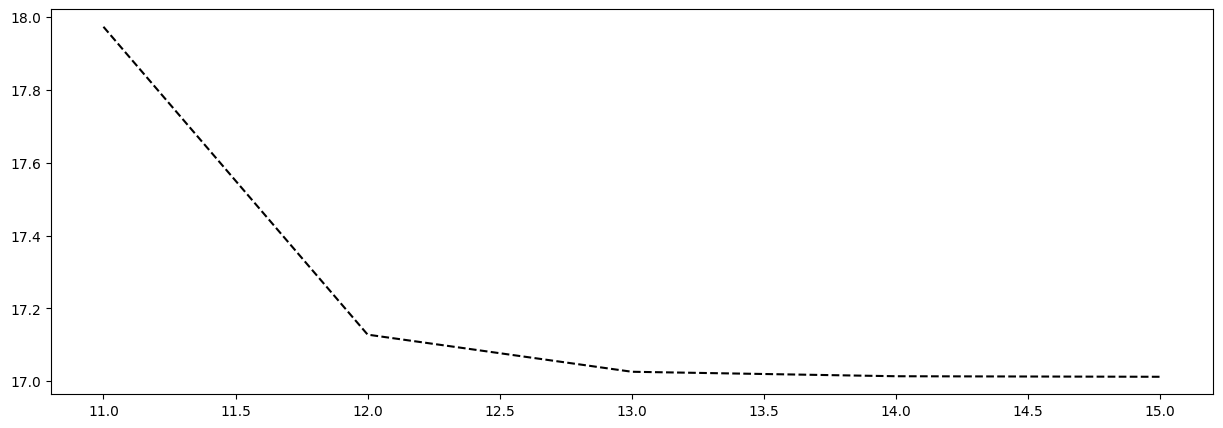

In [56]:
fig, ax = plt.subplots(figsize=(15, 5))
fcast['mean'].plot(ax=ax, style='k--')